In [141]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from scipy.stats import pearsonr, spearmanr



# Load data

In [142]:
df=pd.read_csv("./movies_metadata.csv")
df.head()

C:\Users\anuso\AppData\Local\Temp\ipykernel_21644\1461538378.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("./movies_metadata.csv")


adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1  When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2  A family wedding reignites the ancient feud be...  ...   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4  Just when George Banks has recovered from his ...  ...   1995-02-10   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

# Exploratory Data Analysis (EDA)

## ‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•

### ‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡∏Å‡∏≤‡∏£‡∏Å‡∏£‡∏∞‡∏à‡∏≤‡∏¢‡∏ï‡∏±‡∏ß‡∏Ç‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡∏±‡∏ß‡πÄ‡∏•‡∏Ç

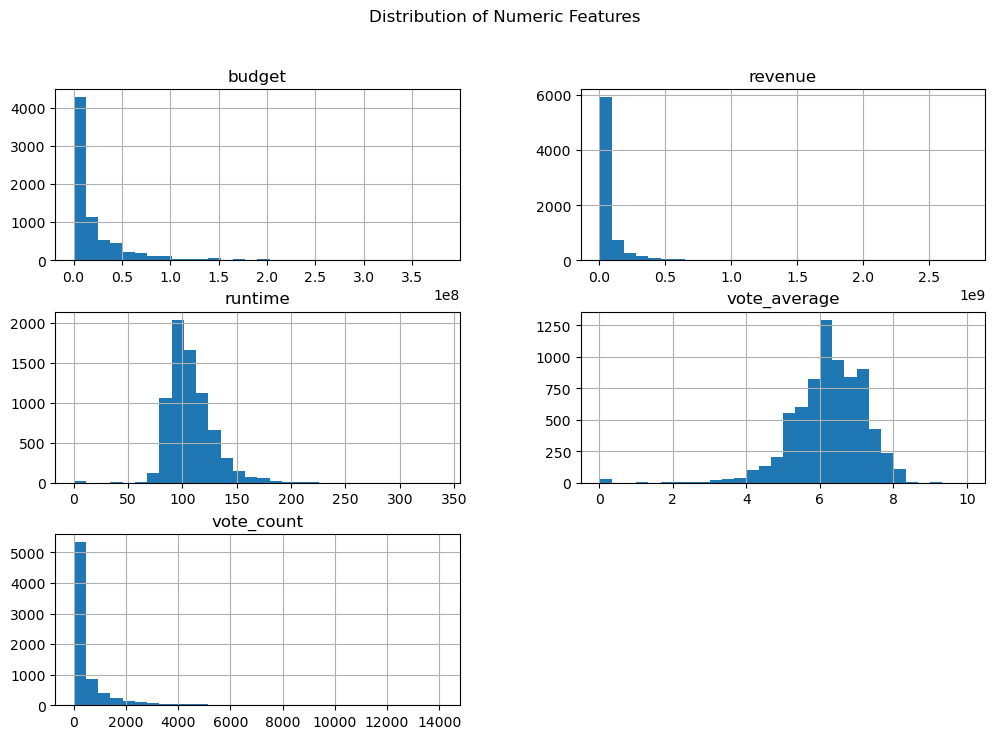

In [150]:
# ‡∏Å‡∏≤‡∏£‡∏Å‡∏£‡∏∞‡∏à‡∏≤‡∏¢‡∏Ñ‡πà‡∏≤‡∏Ç‡∏≠‡∏á‡∏ï‡∏±‡∏ß‡πÄ‡∏•‡∏Ç‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç
num_cols = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']
df[num_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribution of Numeric Features")
plt.show()

### ‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡∏Å‡∏≤‡∏£‡∏Å‡∏£‡∏∞‡∏à‡∏≤‡∏¢‡∏ï‡∏±‡∏ß‡∏Ç‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ‡πÇ‡∏î‡∏¢‡πÉ‡∏ä‡πâ log tranformation

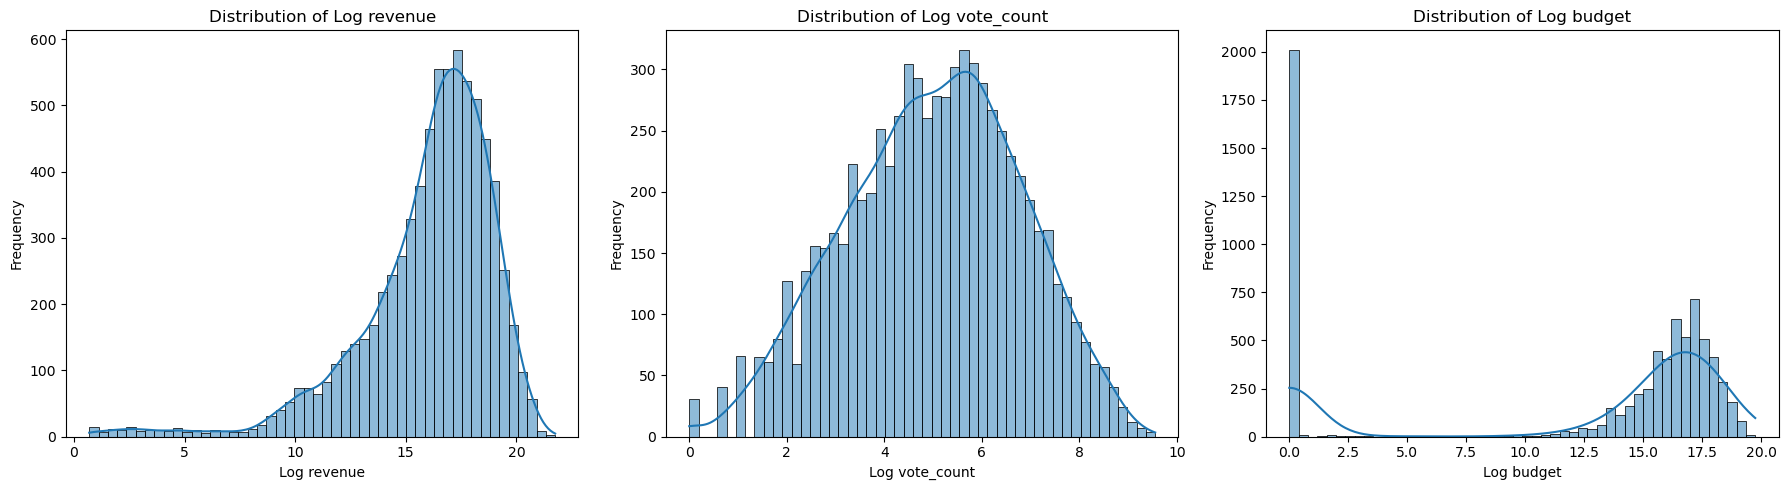

In [151]:
columns = ['revenue', 'vote_count', 'budget']

# ‡∏™‡∏£‡πâ‡∏≤‡∏á subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  

for i, col in enumerate(columns):
    sns.histplot(np.log1p(df[col]), bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of Log {col}')
    axes[i].set_xlabel(f'Log {col}')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### ‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏±‡∏°‡∏û‡∏±‡∏ô‡∏ò‡πå‡∏Å‡∏±‡∏ô‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ì‡πå

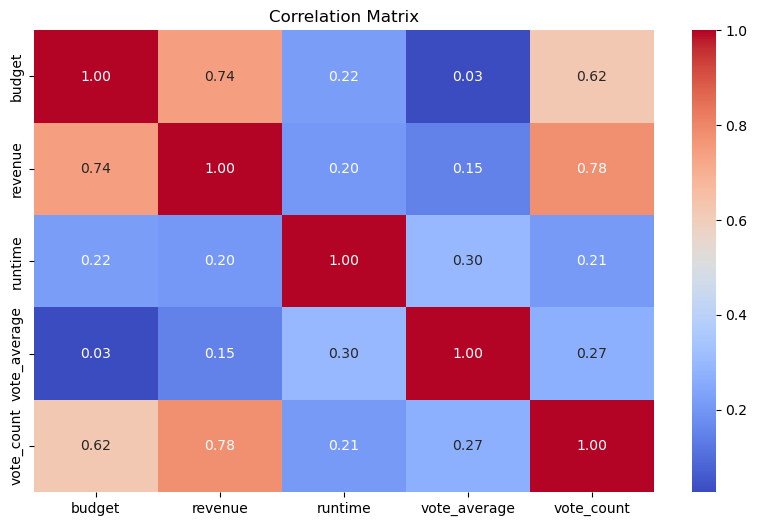

In [152]:
# ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏±‡∏°‡∏û‡∏±‡∏ô‡∏ò‡πå‡∏£‡∏∞‡∏´‡∏ß‡πà‡∏≤‡∏á‡∏ï‡∏±‡∏ß‡πÄ‡∏•‡∏Ç
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### ‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏±‡∏°‡∏û‡∏±‡∏ô‡∏ò‡πå‡∏Ç‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÇ‡∏î‡∏¢‡πÉ‡∏ä‡πâ scatter plot

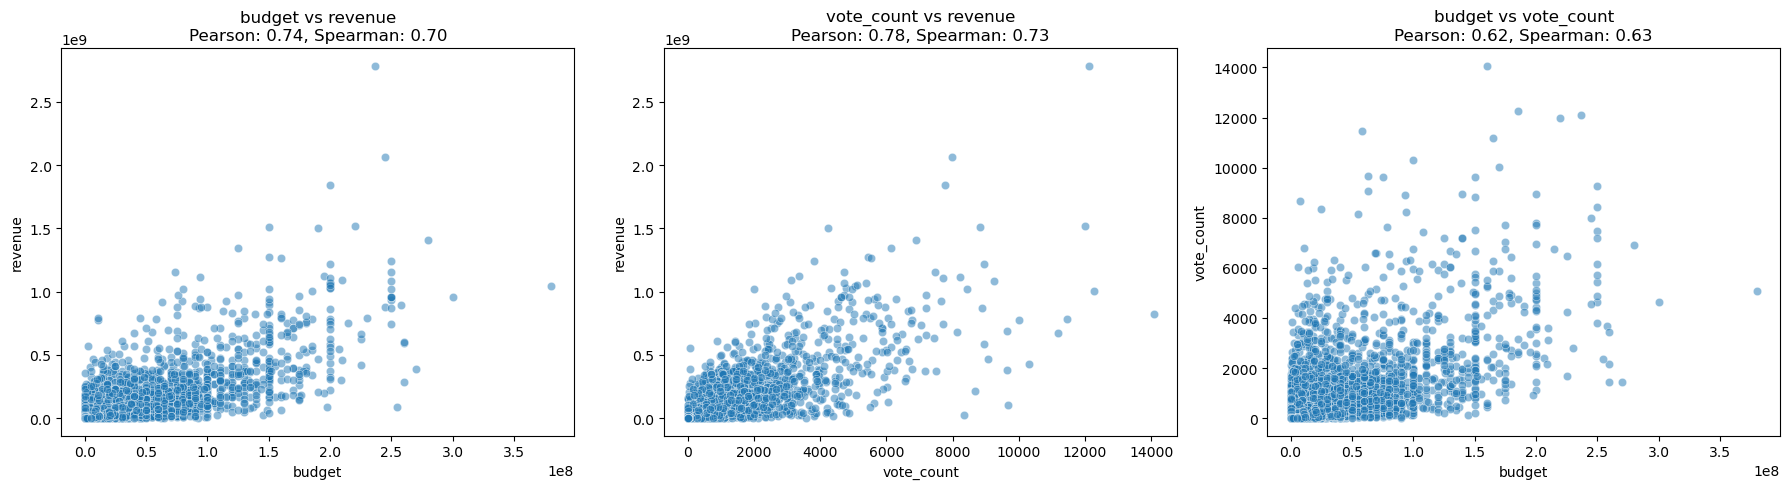

In [153]:
pairs = [('budget', 'revenue'), ('vote_count', 'revenue'), ('budget', 'vote_count')]

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Å‡∏£‡∏≤‡∏ü Scatter Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (x, y) in enumerate(pairs):
    # ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì Pearson ‡πÅ‡∏•‡∏∞ Spearman correlation
    pearson_corr, _ = pearsonr(df[x], df[y])
    spearman_corr, _ = spearmanr(df[x], df[y])

    # Scatter plot
    sns.scatterplot(data=df, x=x, y=y, ax=axes[i], alpha=0.5)
    axes[i].set_title(f'{x} vs {y}\nPearson: {pearson_corr:.2f}, Spearman: {spearman_corr:.2f}')

plt.tight_layout()
plt.show()

### ‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡πÅ‡∏ô‡∏ß‡πÇ‡∏ô‡πâ‡∏°‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡∏Ç‡∏≠‡∏á‡∏†‡∏≤‡∏û‡∏¢‡∏ô‡∏ï‡πå‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏õ‡∏µ
<p> ‡∏à‡∏∞‡πÄ‡∏´‡πá‡∏ô‡πÑ‡∏î‡πâ‡∏ß‡πà‡∏≤‡∏≠‡∏∏‡∏ï‡∏™‡∏≤‡∏´‡∏Å‡∏£‡∏£‡∏°‡∏†‡∏≤‡∏û‡∏¢‡∏ô‡∏ï‡πå‡∏°‡∏µ‡∏Å‡∏≤‡∏£‡πÄ‡∏ï‡∏¥‡∏ö‡πÇ‡∏ï‡∏Ç‡∏∂‡πâ‡∏ô‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏ï‡πà‡∏≠‡πÄ‡∏ô‡∏∑‡πà‡∏≠‡∏á

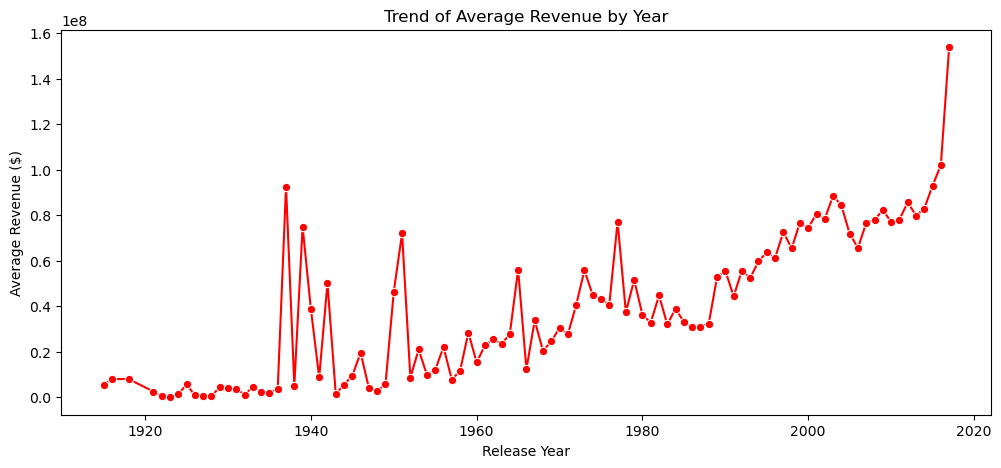

In [154]:

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏õ‡∏µ
yearly_revenue = df.groupby('release_year')['revenue'].mean().reset_index()

# ‡∏î‡∏π‡πÅ‡∏ô‡∏ß‡πÇ‡∏ô‡πâ‡∏°‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏ï‡πà‡∏≠‡∏õ‡∏µ
plt.figure(figsize=(12, 5))
sns.lineplot(x='release_year', y='revenue', data=yearly_revenue, marker="o", color='red')
plt.title("Trend of Average Revenue by Year")
plt.xlabel("Release Year")
plt.ylabel("Average Revenue ($)")
plt.show()

### ‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡∏Ç‡∏≠‡∏á‡∏†‡∏≤‡∏û‡∏¢‡∏ô‡∏ï‡πå‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏ä‡πà‡∏ß‡∏á‡πÄ‡∏î‡∏∑‡∏≠‡∏ô

‡∏à‡∏∞‡πÄ‡∏´‡πá‡∏ô‡πÑ‡∏î‡πâ‡∏ß‡πà‡∏≤‡πÉ‡∏ô‡∏ä‡πà‡∏ß‡∏á‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™‡∏ó‡∏µ‡πà 2 ‡∏Ç‡∏≠‡∏á‡∏õ‡∏µ ‡∏†‡∏≤‡∏û‡∏¢‡∏ô‡∏ï‡πå‡∏°‡∏µ‡πÅ‡∏ô‡∏ß‡πÇ‡∏ô‡πâ‡∏°‡∏ó‡∏µ‡πà‡∏à‡∏∞‡∏ó‡∏≥‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡∏™‡∏π‡∏á

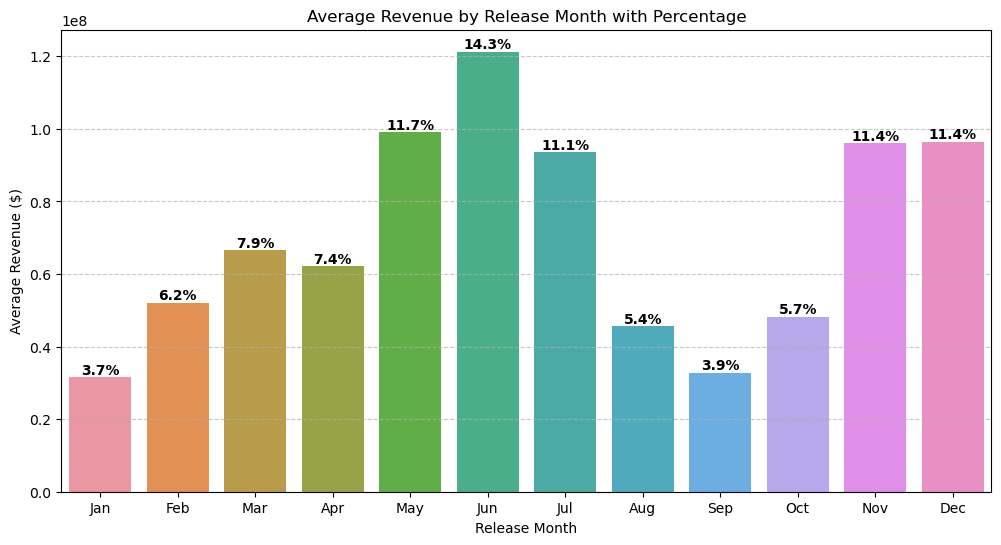

In [155]:
monthly_revenue = df.groupby('release_month')['revenue'].mean().sort_index()

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì % ‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡πÄ‡∏î‡∏∑‡∏≠‡∏ô
total_revenue = monthly_revenue.sum()
monthly_percent = (monthly_revenue / total_revenue) * 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values)

# ‡πÅ‡∏™‡∏î‡∏á % ‡∏ö‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡πÅ‡∏ó‡πà‡∏á
for index, value in enumerate(monthly_revenue.values):
    percent = monthly_percent.iloc[index]
    plt.text(index, value, f"{percent:.1f}%", ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.xlabel("Release Month")
plt.ylabel("Average Revenue ($)")
plt.title("Average Revenue by Release Month with Percentage")
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

### ‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡∏Ç‡∏≠‡∏á‡∏†‡∏≤‡∏û‡∏¢‡∏ô‡∏ï‡πå‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏ä‡πà‡∏ß‡∏á‡πÄ‡∏î‡∏∑‡∏≠‡∏ô‡πÇ‡∏î‡∏¢‡πÅ‡∏¢‡∏Å‡∏ï‡∏≤‡∏°‡∏´‡∏°‡∏ß‡∏î‡∏´‡∏°‡∏π‡πà‡∏Ç‡∏≠‡∏á‡∏†‡∏≤‡∏û‡∏¢‡∏ô‡∏ï‡πå

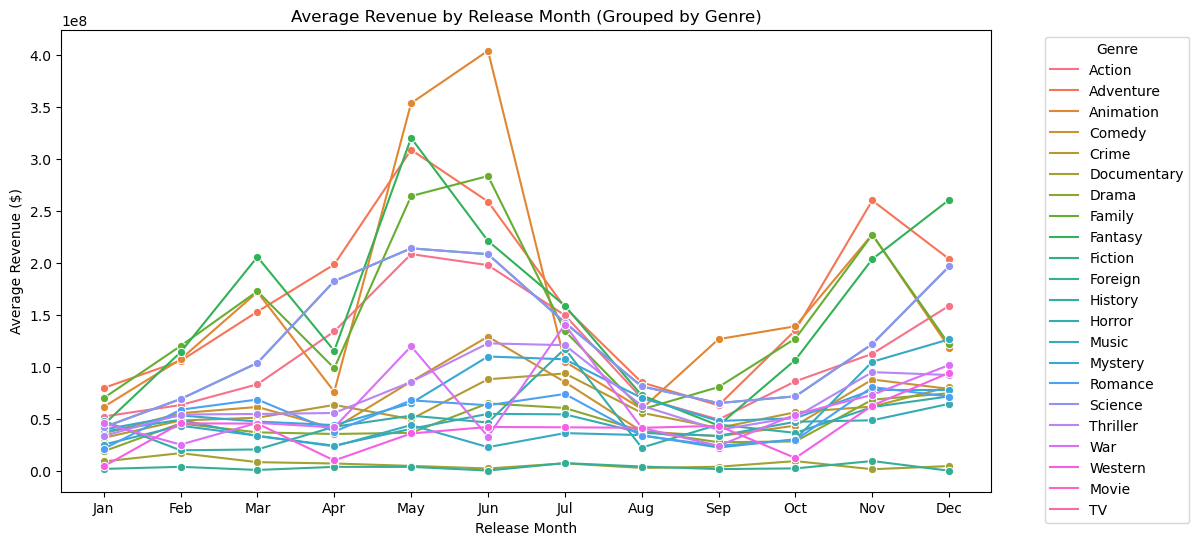

In [156]:

df['genres'] = df['genres'].str.split(' ')  # ‡πÅ‡∏¢‡∏Å genres ‡∏ñ‡πâ‡∏≤‡∏°‡∏µ‡∏´‡∏•‡∏≤‡∏¢‡πÅ‡∏ô‡∏ß
df_genres = df.explode('genres')  # ‡∏Ç‡∏¢‡∏≤‡∏¢‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÉ‡∏´‡πâ 1 ‡πÅ‡∏ô‡∏ß‡∏´‡∏ô‡∏±‡∏á‡∏ï‡πà‡∏≠ 1 ‡πÅ‡∏ñ‡∏ß


# üìå ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡πÄ‡∏î‡∏∑‡∏≠‡∏ô ‡∏ï‡∏≤‡∏° Genre
genre_monthly_revenue = df_genres.groupby(['release_month', 'genres'])['revenue'].mean().reset_index()

# üìå ‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≤‡∏ü Line Plot ‡∏î‡∏π‡πÅ‡∏ô‡∏ß‡πÇ‡∏ô‡πâ‡∏°‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡πÅ‡∏ô‡∏ß‡∏´‡∏ô‡∏±‡∏á
plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_monthly_revenue, x='release_month', y='revenue', hue='genres', marker="o")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Average Revenue by Release Month (Grouped by Genre)")
plt.xlabel("Release Month")
plt.ylabel("Average Revenue ($)")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [157]:
print(df_genres['genres'].unique())

['Animation' 'Comedy' 'Family' 'Adventure' 'Fantasy' 'Drama' 'Romance'
 'Action' 'Crime' 'Thriller' 'History' 'Science' 'Fiction' 'Mystery'
 'Music' 'Horror' 'War' 'Documentary' 'Foreign' 'Western' 'TV' 'Movie']


### ‡πÅ‡∏™‡∏î‡∏á‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏†‡∏≤‡∏û‡∏¢‡∏ô‡∏ï‡πå‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏´‡∏°‡∏ß‡∏î‡∏´‡∏°‡∏π‡πà

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'Animation'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Family'),
  Text(3, 0, 'Adventure'),
  Text(4, 0, 'Fantasy'),
  Text(5, 0, 'Drama'),
  Text(6, 0, 'Romance'),
  Text(7, 0, 'Action'),
  Text(8, 0, 'Crime'),
  Text(9, 0, 'Thriller'),
  Text(10, 0, 'History'),
  Text(11, 0, 'Science'),
  Text(12, 0, 'Fiction'),
  Text(13, 0, 'Mystery'),
  Text(14, 0, 'Music'),
  Text(15, 0, 'Horror'),
  Text(16, 0, 'War'),
  Text(17, 0, 'Documentary'),
  Text(18, 0, 'Foreign'),
  Text(19, 0, 'Western'),
  Text(20, 0, 'TV'),
  Text(21, 0, 'Movie')])

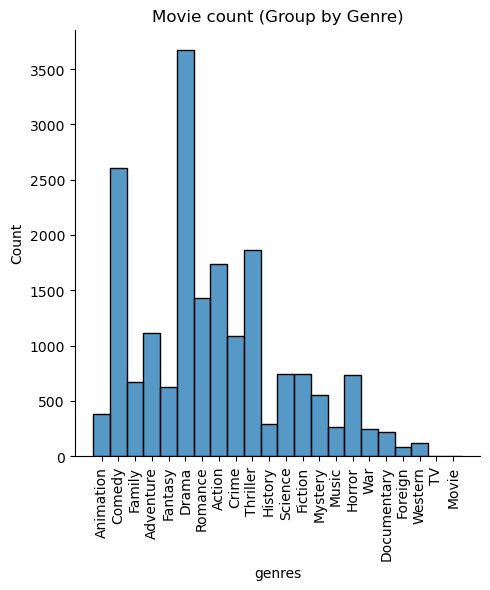

In [158]:
sns.displot(df_genres['genres'])
plt.title("Movie count (Group by Genre)")
plt.xticks(rotation=90)

### ‡πÅ‡∏™‡∏î‡∏á‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡πÇ‡∏´‡∏ß‡∏ï‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡∏†‡∏≤‡∏û‡∏¢‡∏ô‡∏ï‡πå‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏´‡∏°‡∏ß‡∏î‡∏´‡∏°‡∏π‡πà

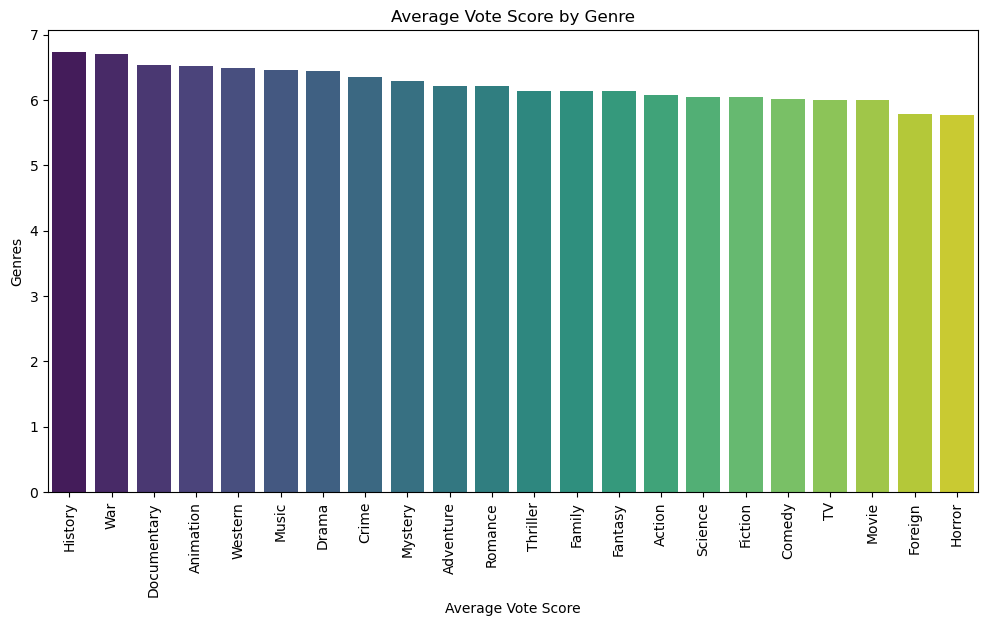

In [159]:
# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡πÅ‡∏ô‡∏ß
genre_avg_score = df_genres.groupby('genres')['vote_average'].mean().sort_values(ascending=False)

# ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_avg_score.index, y=genre_avg_score.values, palette="viridis")
plt.xlabel("Average Vote Score")
plt.ylabel("Genres")
plt.title("Average Vote Score by Genre")
plt.xticks(rotation=90)
plt.show()

### ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡∏Ç‡∏≠‡∏á‡∏†‡∏≤‡∏û‡∏¢‡∏ô‡∏ï‡πå‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏´‡∏°‡∏ß‡∏î‡∏´‡∏°‡∏π‡πà

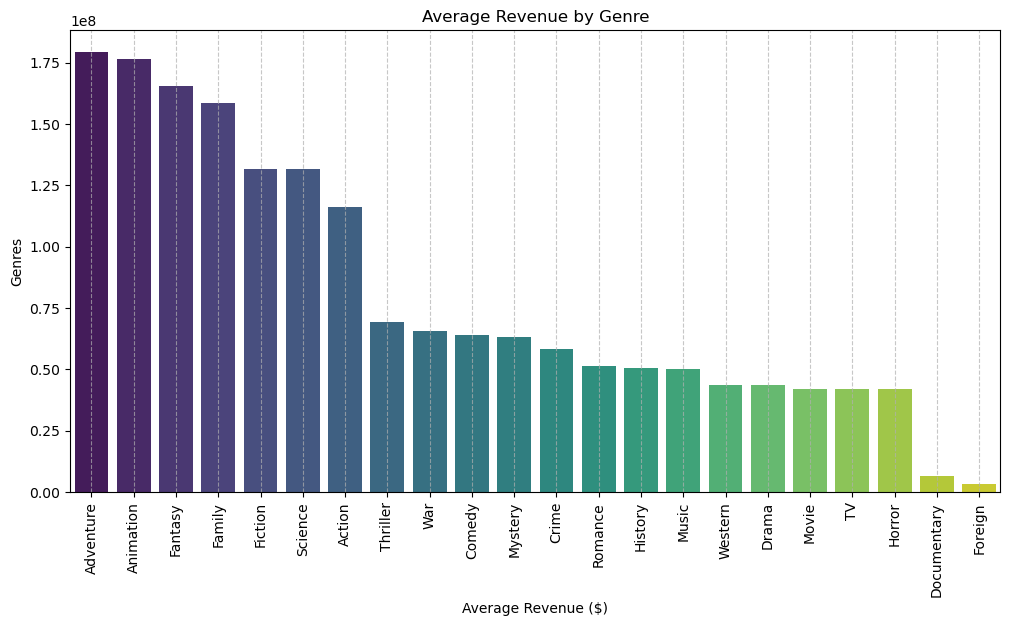

In [160]:
# üìå ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡πÅ‡∏ô‡∏ß‡∏´‡∏ô‡∏±‡∏á
genre_revenue = df_genres.groupby('genres')['revenue'].mean().sort_values(ascending=False)

# üìå ‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≤‡∏ü Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_revenue.index, y=genre_revenue.values, palette="viridis")

# üìå ‡∏ï‡∏Å‡πÅ‡∏ï‡πà‡∏á‡∏Å‡∏£‡∏≤‡∏ü
plt.xlabel("Average Revenue ($)")
plt.ylabel("Genres")
plt.title("Average Revenue by Genre")
plt.xticks(rotation=90)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# üìå ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•
plt.show()

### ‡πÅ‡∏™‡∏î‡∏á‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡πÉ‡∏ô‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™ 2 ‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏Å‡∏±‡∏ö‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏õ‡∏µ

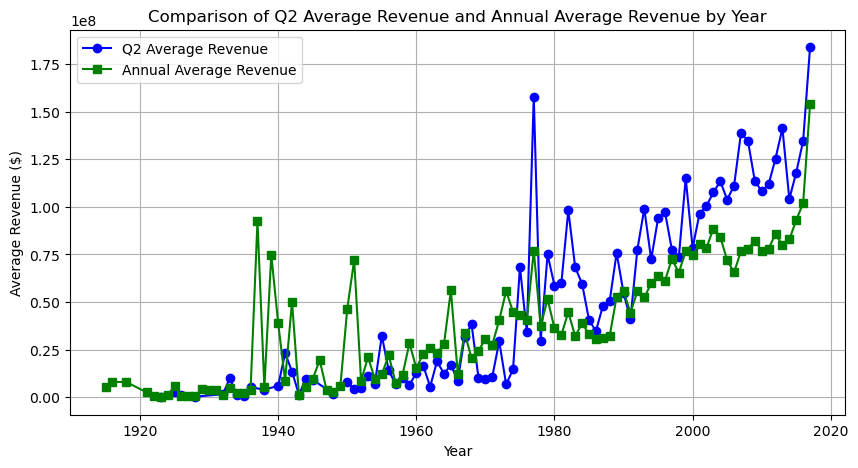

In [161]:
df_q2=df[df['release_month'].isin([4, 5, 6])]
q2_avg_per_year = df_q2.groupby(df_q2['release_date'].dt.year)['revenue'].mean()

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏ó‡∏±‡πâ‡∏á‡∏õ‡∏µ
annual_avg_per_year = df.groupby(df['release_date'].dt.year)['revenue'].mean()

# üîπ ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Å‡∏£‡∏≤‡∏ü‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢ Q2 ‡πÅ‡∏•‡∏∞‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏ó‡∏±‡πâ‡∏á‡∏õ‡∏µ
plt.figure(figsize=(10, 5))
plt.plot(q2_avg_per_year.index, q2_avg_per_year.values, marker='o', label="Q2 Average Revenue", color='b')
plt.plot(annual_avg_per_year.index, annual_avg_per_year.values, marker='s', label="Annual Average Revenue", color='g')

# üîπ ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏£‡∏≤‡∏ü
plt.xlabel("Year")
plt.ylabel("Average Revenue ($)")
plt.title("Comparison of Q2 Average Revenue and Annual Average Revenue by Year")
plt.legend()
plt.grid(True)
plt.show()

### ‡πÅ‡∏™‡∏î‡∏á % ‡∏ó‡∏µ‡πà‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™2‡∏ó‡∏≥‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡∏™‡∏π‡∏á‡∏Å‡∏ß‡πà‡∏≤‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏õ‡∏µ

‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á % ‡∏ó‡∏µ‡πà‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡πÉ‡∏ô Q2 ‡∏™‡∏π‡∏á‡∏Å‡∏ß‡πà‡∏≤‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡∏ó‡∏±‡πâ‡∏á‡∏õ‡∏µ: 11.92%


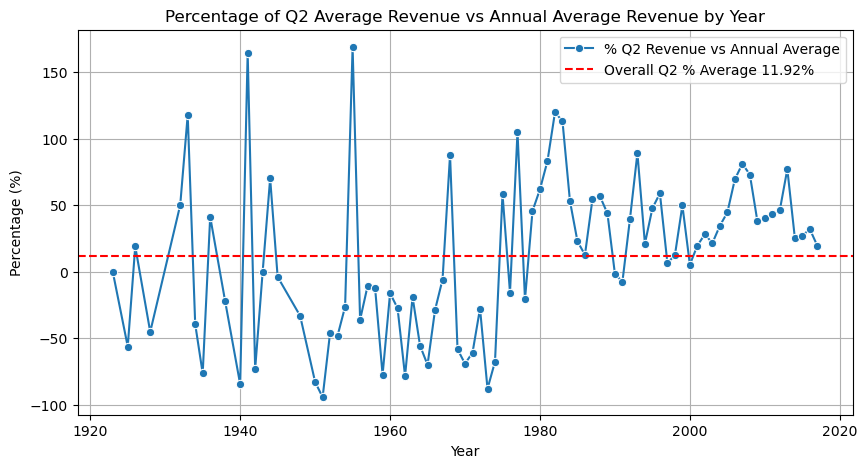

In [ ]:
df_q2 = df[df['release_date'].dt.month.isin([4, 5, 6])]
q2_avg_per_year = df_q2.groupby(df_q2['release_date'].dt.year)['revenue'].mean()

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏ó‡∏±‡πâ‡∏á‡∏õ‡∏µ
annual_avg_per_year = df.groupby(df['release_date'].dt.year)['revenue'].mean()

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡πÄ‡∏õ‡∏≠‡∏£‡πå‡πÄ‡∏ã‡πá‡∏ô‡∏ï‡πå‡∏ó‡∏µ‡πà‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡πÉ‡∏ô Q2 ‡∏™‡∏π‡∏á‡∏Å‡∏ß‡πà‡∏≤‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏ó‡∏±‡πâ‡∏á‡∏õ‡∏µ
q2_vs_annual_percentage = ((q2_avg_per_year-annual_avg_per_year) / annual_avg_per_year ) * 100

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡πÄ‡∏õ‡∏≠‡∏£‡πå‡πÄ‡∏ã‡πá‡∏ô‡∏ï‡πå
overall_q2_percentage_avg = q2_vs_annual_percentage.mean()
print(f"‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á % ‡∏ó‡∏µ‡πà‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡πÉ‡∏ô Q2 ‡∏™‡∏π‡∏á‡∏Å‡∏ß‡πà‡∏≤‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡∏ó‡∏±‡πâ‡∏á‡∏õ‡∏µ: {overall_q2_percentage_avg:,.2f}%")


plt.figure(figsize=(10, 5))
sns.lineplot(x=q2_vs_annual_percentage.index, y=q2_vs_annual_percentage.values, marker='o', label="% Q2 Revenue vs Annual Average")
plt.axhline(overall_q2_percentage_avg, color='r', linestyle='--', label=f"Overall Q2 % Average {overall_q2_percentage_avg:,.2f}%")
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.title("Percentage of Q2 Average Revenue vs Annual Average Revenue by Year")
plt.legend()
plt.grid(True)
plt.show()

### ‡πÅ‡∏™‡∏î‡∏á‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡πÉ‡∏ô‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™ 2 ‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏Å‡∏±‡∏ö‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏õ‡∏µ

<Figure size 1000x500 with 0 Axes>

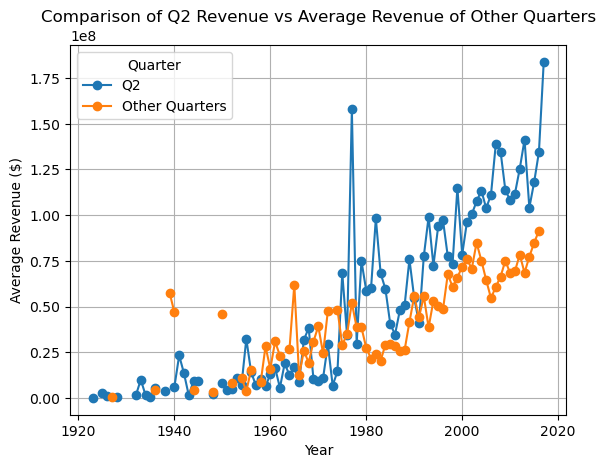

In [ ]:
df['quarter'] = df['release_date'].dt.quarter

# ‡∏Å‡∏£‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™‡∏ó‡∏µ‡πà 1, 2, 3, ‡πÅ‡∏•‡∏∞ 4
q1_data = df[df['release_date'].dt.month.isin([1, 2, 3])]
q2_data = df[df['release_date'].dt.month.isin([4, 5, 6])]
q3_data = df[df['release_date'].dt.month.isin([7, 8, 9])]
q4_data = df[df['release_date'].dt.month.isin([10, 11, 12])]

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™
q1_avg = q1_data.groupby('release_year')['revenue'].mean()
q2_avg = q2_data.groupby('release_year')['revenue'].mean()
q3_avg = q3_data.groupby('release_year')['revenue'].mean()
q4_avg = q4_data.groupby('release_year')['revenue'].mean()

# ‡∏£‡∏ß‡∏°‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á Q1, Q3, Q4
other_quarters_avg = (q1_avg + q3_avg + q4_avg) / 3

# ‡∏™‡∏£‡πâ‡∏≤‡∏á DataFrame ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Å‡∏£‡∏≤‡∏ü
quarterly_avg_comparison = pd.DataFrame({
    'Q2': q2_avg,
    'Other Quarters': other_quarters_avg
})

# ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Å‡∏£‡∏≤‡∏ü
plt.figure(figsize=(10, 5))
quarterly_avg_comparison.plot(kind='line', marker='o')
plt.title('Comparison of Q2 Revenue vs Average Revenue of Other Quarters')
plt.xlabel('Year')
plt.ylabel('Average Revenue ($)')
plt.grid(True)
plt.legend(title='Quarter', loc='upper left')
plt.show()

### ‡πÅ‡∏™‡∏î‡∏á % ‡∏ó‡∏µ‡πà‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™2‡∏ó‡∏≥‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡∏™‡∏π‡∏á‡∏Å‡∏ß‡πà‡∏≤‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡πÉ‡∏ô‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™‡∏≠‡∏∑‡πà‡∏ô‡πÜ

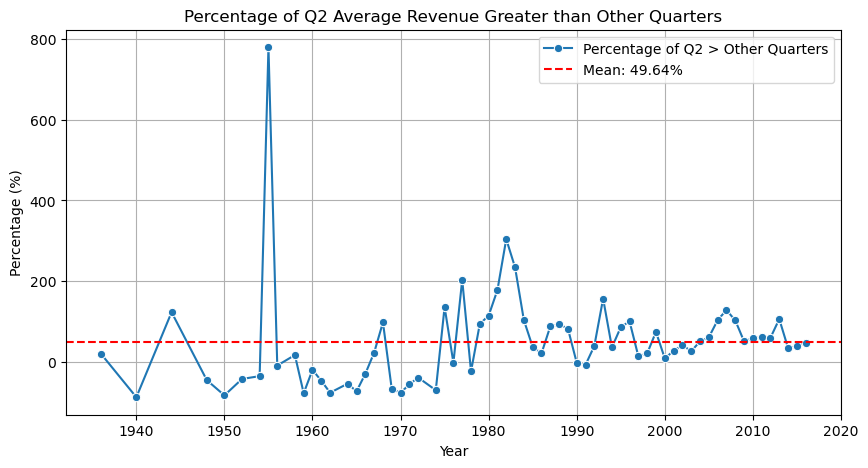

In [164]:
percentage_q2_greater = ((q2_avg - other_quarters_avg) / other_quarters_avg) * 100

# ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Å‡∏£‡∏≤‡∏ü‡πÄ‡∏õ‡∏≠‡∏£‡πå‡πÄ‡∏ã‡πá‡∏ô‡∏ï‡πå
plt.figure(figsize=(10, 5))
sns.lineplot(x=percentage_q2_greater.index, y=percentage_q2_greater.values, marker='o', label="Percentage of Q2 > Other Quarters")
plt.axhline(percentage_q2_greater.mean(), color='r', linestyle='--', label=f"Mean: {percentage_q2_greater.mean():.2f}%")
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.title("Percentage of Q2 Average Revenue Greater than Other Quarters")
plt.legend()
plt.grid(True)
plt.show()



In [165]:
print(df_genres['genres'].unique())  # ‡∏î‡∏π‡∏ß‡πà‡∏≤‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏≠‡∏∞‡πÑ‡∏£‡∏≠‡∏¢‡∏π‡πà‡πÉ‡∏ô‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå genre ‡∏ö‡πâ‡∏≤‡∏á
print(df_genres['genres'].isna().sum())

['Animation' 'Comedy' 'Family' 'Adventure' 'Fantasy' 'Drama' 'Romance'
 'Action' 'Crime' 'Thriller' 'History' 'Science' 'Fiction' 'Mystery'
 'Music' 'Horror' 'War' 'Documentary' 'Foreign' 'Western' 'TV' 'Movie']
0


## Hypothesis testing

H0(Null Hypothesis): ‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡∏†‡∏≤‡∏û‡∏¢‡∏ô‡∏ï‡πå‡∏ó‡∏µ‡πà‡∏â‡∏≤‡∏¢‡πÉ‡∏ô‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™ 2 ‡∏™‡∏π‡∏á‡∏Å‡∏ß‡πà‡∏≤‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™‡∏≠‡∏∑‡πà‡∏ô‡πÜ 47 % ‡πÄ‡∏Å‡∏¥‡∏î‡∏à‡∏≤‡∏Å‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ö‡∏±‡∏á‡πÄ‡∏≠‡∏¥‡∏ç

H1(Alternative Hypothesis): ‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡∏´‡∏ô‡∏±‡∏á‡∏ó‡∏µ‡πà‡∏â‡∏≤‡∏¢‡πÉ‡∏ô‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™ 2 ‡∏™‡∏π‡∏á‡∏Å‡∏ß‡πà‡∏≤‡∏Ç‡∏≠‡∏á‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™‡∏≠‡∏∑‡πà‡∏ô‡πÜ 47 % ‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡πÄ‡∏Å‡∏¥‡∏î‡∏à‡∏≤‡∏Å‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ö‡∏±‡∏á‡πÄ‡∏≠‡∏¥‡∏ç

In [166]:
mean_q2=df_q2['revenue'].mean()
df_q_other=df.drop(df_q2.index)
mean_other=df_q_other['revenue'].mean()

percentage_increase = (mean_q2 - mean_other) * 100 / mean_other

print(f'‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™‡∏ó‡∏µ‡πà 2 ‡∏Ñ‡∏∑‡∏≠ {mean_q2:.2f}')
print(f'‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡∏ó‡∏±‡πâ‡∏á‡∏õ‡∏µ‡∏Ñ‡∏∑‡∏≠ {mean_other:.2f}')


‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™‡∏ó‡∏µ‡πà 2 ‡∏Ñ‡∏∑‡∏≠ 94799797.06
‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡∏ó‡∏±‡πâ‡∏á‡∏õ‡∏µ‡∏Ñ‡∏∑‡∏≠ 61146377.61


In [167]:
std_q2=df_q2['revenue'].std()
std_q_other=df_q_other['revenue'].std()
print(f'std ‡∏Ç‡∏≠‡∏á‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡∏Ç‡∏≠‡∏á‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™‡∏ó‡∏µ‡πà 2 ‡∏Ñ‡∏∑‡∏≠ {std_q2:.2f}')
print(f'std ‡∏Ç‡∏≠‡∏á‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™‡∏≠‡∏∑‡πà‡∏ô‡πÜ‡∏Ñ‡∏∑‡∏≠ {std_q_other:.2f}')


std ‡∏Ç‡∏≠‡∏á‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡∏Ç‡∏≠‡∏á‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™‡∏ó‡∏µ‡πà 2 ‡∏Ñ‡∏∑‡∏≠ 193515647.67
std ‡∏Ç‡∏≠‡∏á‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™‡∏≠‡∏∑‡πà‡∏ô‡πÜ‡∏Ñ‡∏∑‡∏≠ 127927413.00


In [168]:
nq2=len(df_q2)
nqother=len(df_q_other)
print(f'‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Ç‡∏≠‡∏á‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™‡∏ó‡∏µ‡πà 2 ‡∏Ñ‡∏∑‡∏≠ {nq2}')
print(f'‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Ç‡∏≠‡∏á‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™‡∏≠‡∏∑‡πà‡∏ô‡πÜ‡∏Ñ‡∏∑‡∏≠ {nqother}')


‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Ç‡∏≠‡∏á‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™‡∏ó‡∏µ‡πà 2 ‡∏Ñ‡∏∑‡∏≠ 1733
‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Ç‡∏≠‡∏á‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™‡∏≠‡∏∑‡πà‡∏ô‡πÜ‡∏Ñ‡∏∑‡∏≠ 5641


### ‡πÉ‡∏ä‡πâ‡∏ß‡∏¥‡∏ò‡∏µ‡∏Å‡∏≤‡∏£ Resample ‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏ó‡∏î‡∏™‡∏≠‡∏ö‡∏™‡∏°‡∏°‡∏ï‡∏¥‡∏ê‡∏≤‡∏ô 
‡πÇ‡∏î‡∏¢‡∏™‡∏∏‡πà‡∏°‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏à‡∏≥‡∏ô‡∏ß‡∏ô 100000 ‡∏Ñ‡∏£‡∏±‡πâ‡∏á ‡πÅ‡∏•‡∏∞‡∏ô‡∏≥ gA ‡πÅ‡∏•‡∏∞ gB ‡∏°‡∏≤‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö% ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ï‡πà‡∏≤‡∏á

In [169]:
res = []
for _ in range(100000):
    gA = df.sample(len(df_q2['revenue'])).revenue
    gB = df.drop(gA.index).revenue
    res.append((gA.mean()-gB.mean())/gB.mean()*100)

‡∏ô‡∏≥‡∏°‡∏≤‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì p_value ‡πÇ‡∏î‡∏¢‡∏Å‡∏≤‡∏£‡∏´‡∏≤‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ô‡πà‡∏≤‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô‡∏ó‡∏µ‡πà gA ‡∏à‡∏∞‡∏°‡∏≤‡∏Å‡∏Å‡∏ß‡πà‡∏≤ gB 49%

In [ ]:
resample_diff=pd.Series(res)
p_value=sum(resample_diff>=49)/len(resample_diff)
p_value

0.0

## ‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö p_value ‡∏Å‡∏±‡∏ö alpha

In [177]:
alpha = 0.05  # ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏ô‡∏±‡∏¢‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç‡∏ó‡∏µ‡πà 5%
print(f"p_value = {p_value}")
if p_value < alpha:
    print("‡∏°‡∏µ‡∏´‡∏•‡∏±‡∏Å‡∏ê‡∏≤‡∏ô‡πÄ‡∏û‡∏µ‡∏¢‡∏á‡∏û‡∏≠‡∏ó‡∏µ‡πà‡∏à‡∏∞‡∏™‡∏£‡∏∏‡∏õ‡∏ß‡πà‡∏≤‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™ 2 ‡∏™‡∏π‡∏á‡∏Å‡∏ß‡πà‡∏≤‡∏ó‡∏±‡πâ‡∏á‡∏õ‡∏µ 49%")
else:
    print("‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏´‡∏•‡∏±‡∏Å‡∏ê‡∏≤‡∏ô‡πÄ‡∏û‡∏µ‡∏¢‡∏á‡∏û‡∏≠‡∏ó‡∏µ‡πà‡∏à‡∏∞‡∏™‡∏£‡∏∏‡∏õ‡∏ß‡πà‡∏≤‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™ 2 ‡∏™‡∏π‡∏á‡∏Å‡∏ß‡πà‡∏≤‡∏ó‡∏±‡πâ‡∏á‡∏õ‡∏µ 49%")


p_value = 0.0
‡∏°‡∏µ‡∏´‡∏•‡∏±‡∏Å‡∏ê‡∏≤‡∏ô‡πÄ‡∏û‡∏µ‡∏¢‡∏á‡∏û‡∏≠‡∏ó‡∏µ‡πà‡∏à‡∏∞‡∏™‡∏£‡∏∏‡∏õ‡∏ß‡πà‡∏≤‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™ 2 ‡∏™‡∏π‡∏á‡∏Å‡∏ß‡πà‡∏≤‡∏ó‡∏±‡πâ‡∏á‡∏õ‡∏µ 49%


C:\Users\anuso\AppData\Local\Temp\ipykernel_21644\4008656360.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resample_diff)


Text(0.5, 1.0, 'Permutation Test: Revenue Difference Distribution')

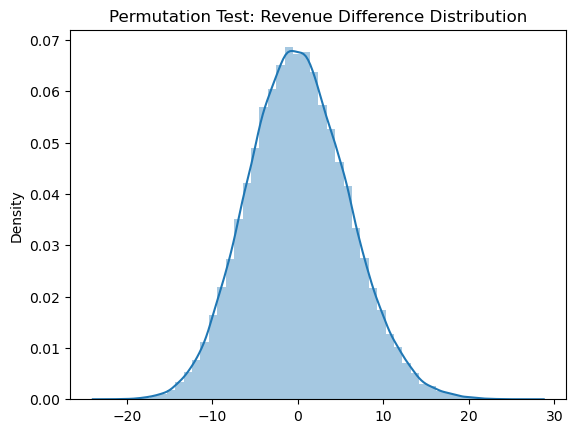

In [172]:
sns.distplot(resample_diff)
plt.title('Permutation Test: Revenue Difference Distribution')

‡∏´‡∏≤ Confidence Interval ‡∏Ç‡∏≠‡∏á‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™ 2 ‡πÅ‡∏•‡∏∞‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™‡∏≠‡∏∑‡πà‡∏ô‡πÜ

In [173]:
l_q2 = []
for _ in range(1000):
    tem = df_q2.sample(1000, replace=True)['revenue'].mean() 
    l_q2.append(tem)

q2_s = pd.Series(l_q2) 
print(f"Confidence Interval ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™ 2 \n{q2_s.quantile([0.975, 0.025])}")

l_qo = []
for _ in range(1000):
    tem = df_q_other.sample(1000, replace=True)['revenue'].mean() 
    l_qo.append(tem)

qo_s = pd.Series(l_qo) 
print(f"Confidence Interval ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™‡∏≠‡∏∑‡πà‡∏ô‡πÜ \n{qo_s.quantile([0.975, 0.025])}")

Confidence Interval ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™ 2 
0.975    1.067556e+08
0.025    8.312185e+07
dtype: float64
Confidence Interval ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™‡∏≠‡∏∑‡πà‡∏ô‡πÜ 
0.975    6.896937e+07
0.025    5.303619e+07
dtype: float64


       genres       revenue
2   Animation  3.318316e+08
1   Adventure  2.587722e+08
7      Family  2.337355e+08
8     Fantasy  2.191109e+08
16    Science  2.028259e+08
9     Fiction  2.028259e+08
0      Action  1.809149e+08
17   Thriller  8.725030e+07
3      Comedy  8.582779e+07
14    Mystery  6.951796e+07


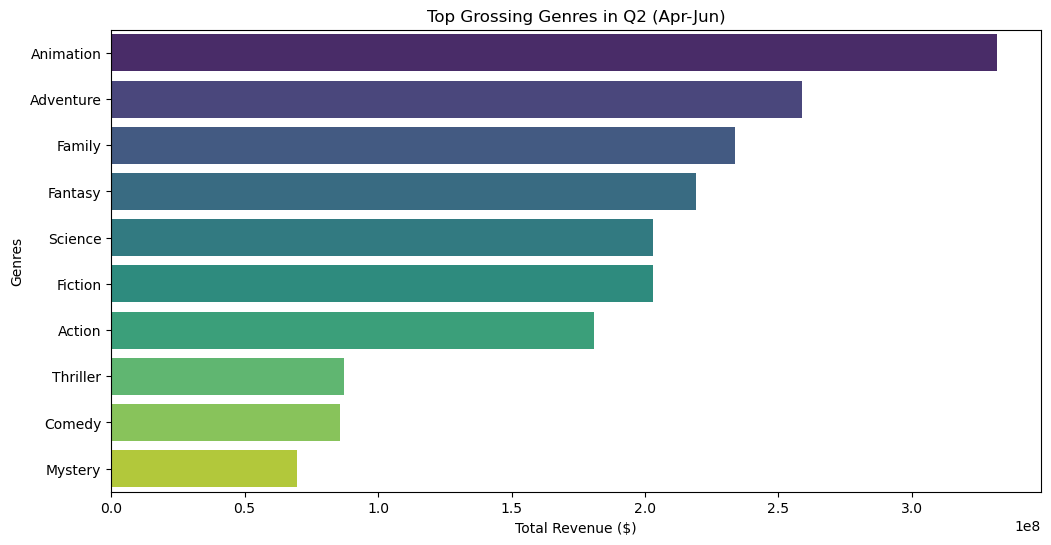

In [ ]:
q2=df_genres[(df_genres['release_month']>=4) & (df['release_month']<=6)]
genre_revenue_q2 = q2.groupby('genres')['revenue'].mean().reset_index()

# ‡∏à‡∏±‡∏î‡∏≠‡∏±‡∏ô‡∏î‡∏±‡∏ö‡πÅ‡∏ô‡∏ß‡∏´‡∏ô‡∏±‡∏á‡∏ó‡∏µ‡πà‡∏ó‡∏≥‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡∏™‡∏π‡∏á‡∏™‡∏∏‡∏î
genre_revenue_q2 = genre_revenue_q2.sort_values(by='revenue', ascending=False)

# ‡πÅ‡∏™‡∏î‡∏á 10 ‡∏≠‡∏±‡∏ô‡∏î‡∏±‡∏ö‡πÅ‡∏ô‡∏ß‡∏´‡∏ô‡∏±‡∏á‡∏ó‡∏µ‡πà‡∏ó‡∏≥‡∏£‡∏≤‡∏¢‡πÑ‡∏î‡πâ‡∏™‡∏π‡∏á‡∏™‡∏∏‡∏î‡πÉ‡∏ô‡πÑ‡∏ï‡∏£‡∏°‡∏≤‡∏™ 2
print(genre_revenue_q2.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_revenue_q2.head(10), x='revenue', y='genres', palette='viridis')
plt.title("Top Grossing Genres in Q2 (Apr-Jun)")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Genres")
plt.show()